In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

#Problem 1 : Hand Gesture Recognition using CNN

### Dataset

In [ ]:
df=pd.read_csv('sign_mnist_train.csv')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
def plot_sample_images(df, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        image_data = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
        label = df.iloc[i, 0]  # Extract label
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image_data, cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

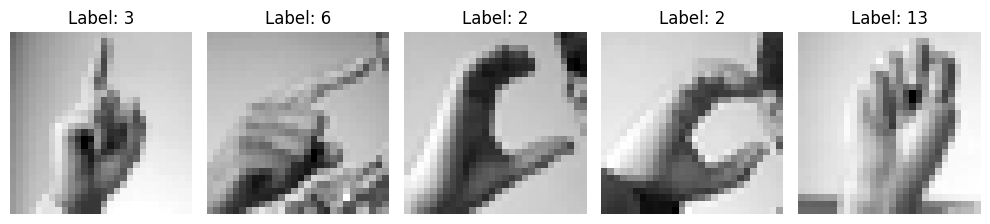

In [ ]:
plot_sample_images(df, num_samples=5)

### CNN Architecture

In [ ]:
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten the feature maps
    layers.Flatten(),
    # Fully Connected Layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.28),  # Dropout to prevent overfitting
    # Output Layer
    layers.Dense(26, activation='softmax')  # 26 classes for 'A'-'Z'
])
model.compile(optimizer='adamW',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

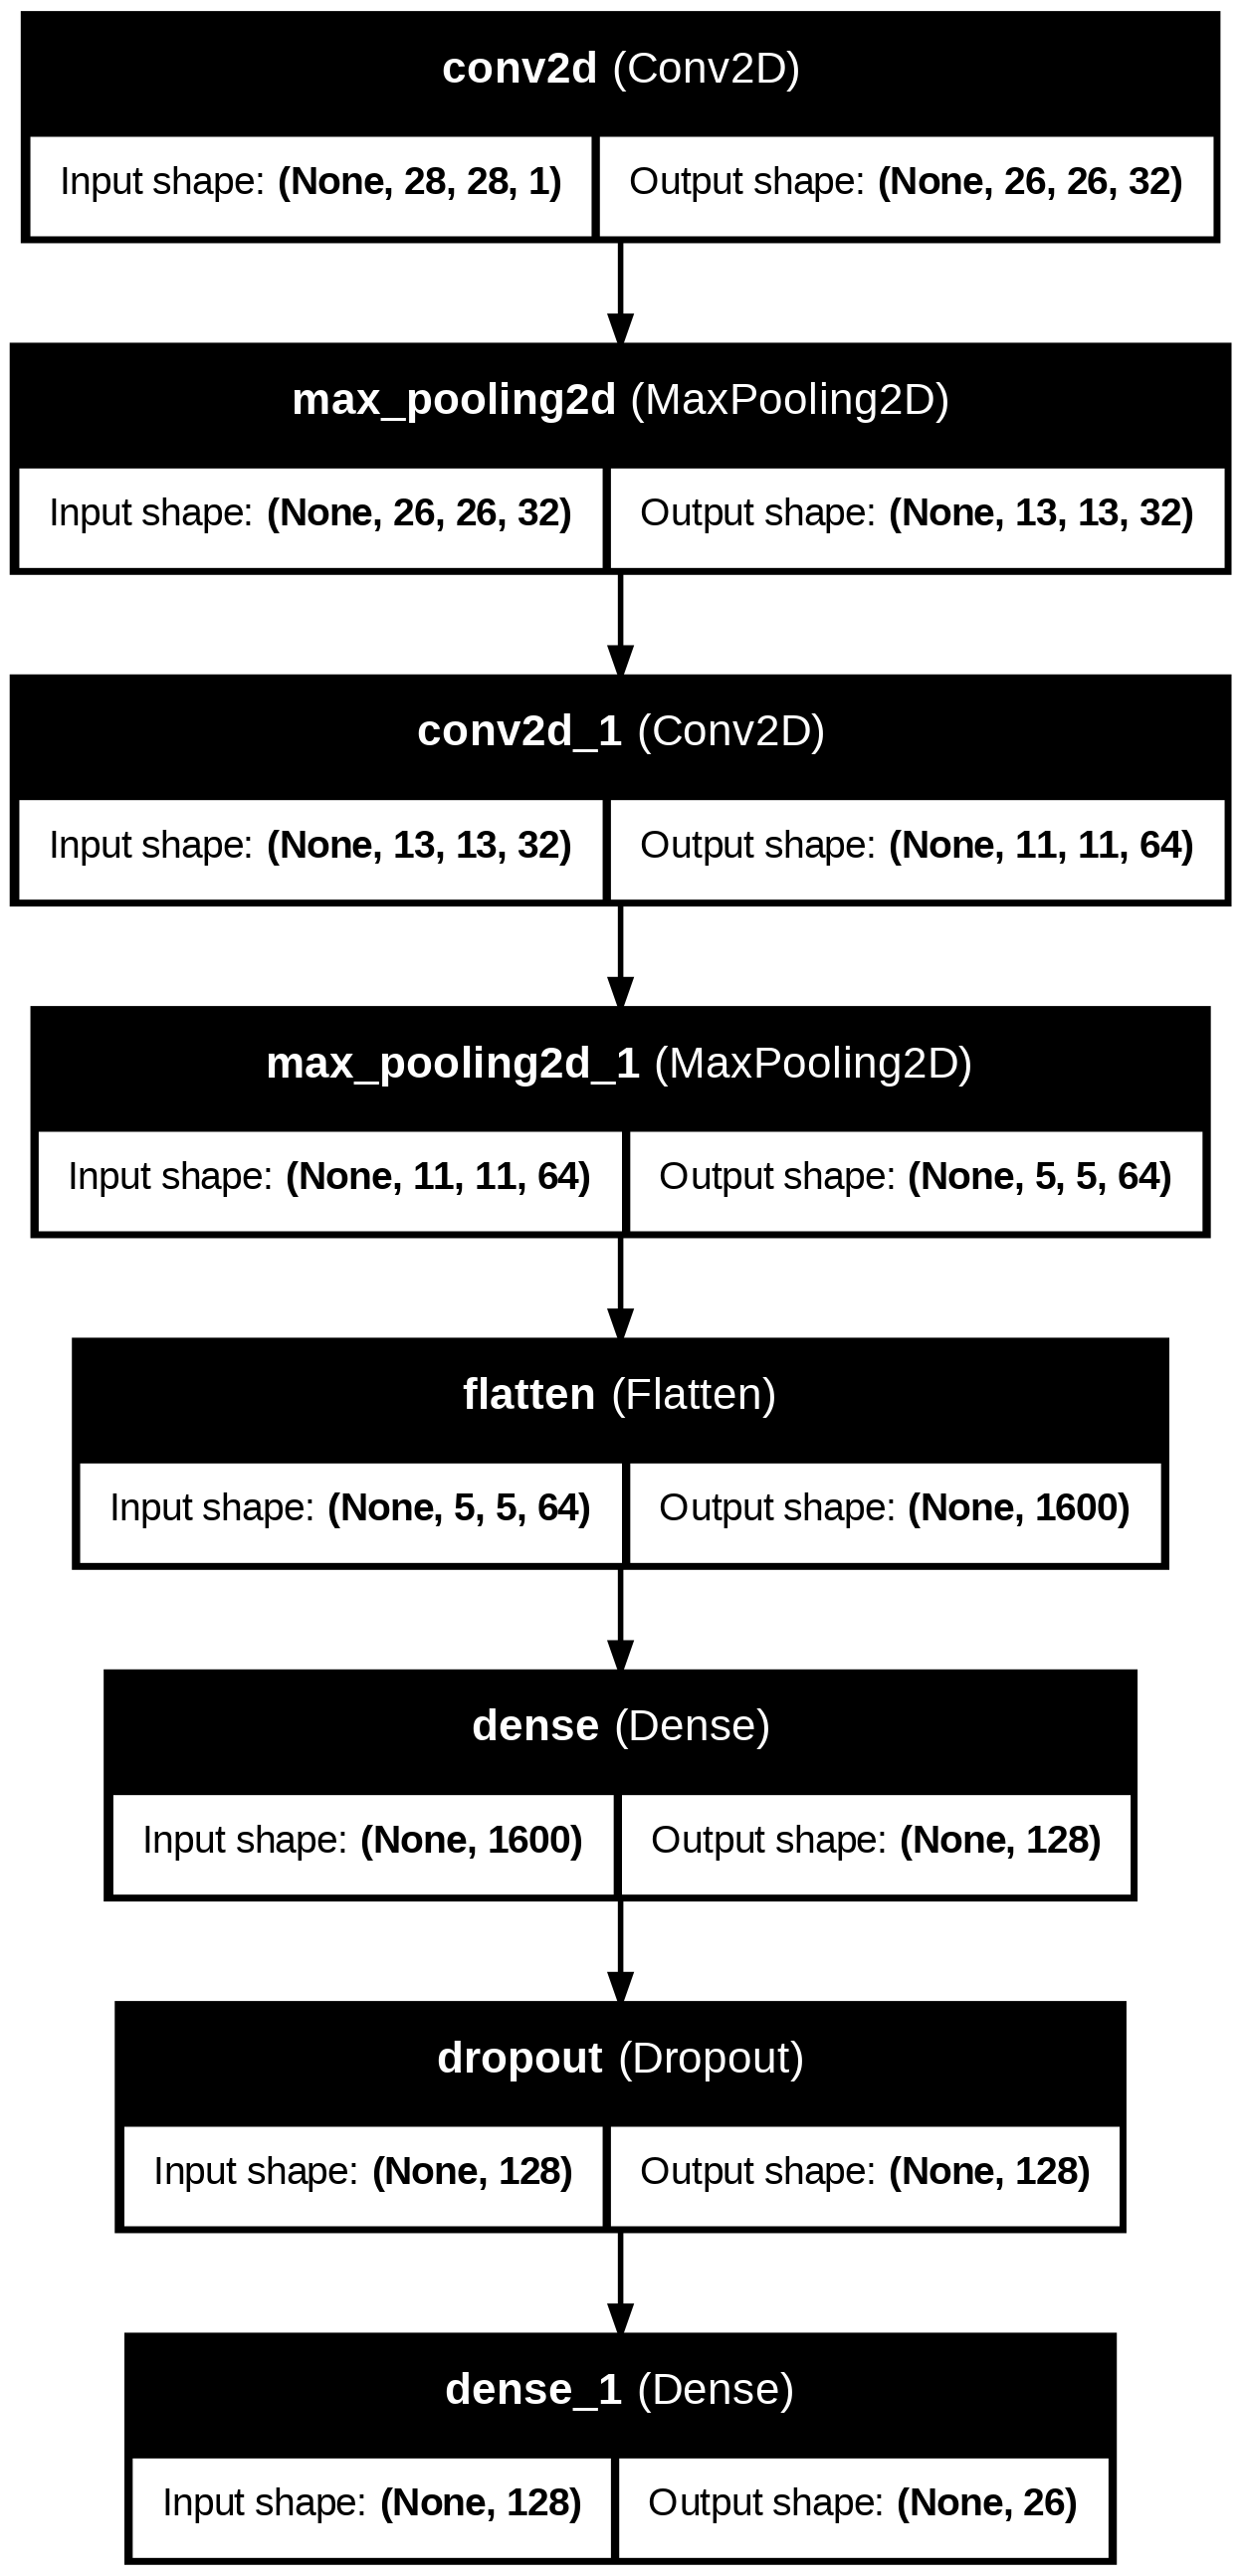

In [ ]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_architecture.png', width=400)

### Model Training and Evaluation

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.2687 - loss: 2.4709 - val_accuracy: 0.8800 - val_loss: 0.4686
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8117 - loss: 0.5843 - val_accuracy: 0.9703 - val_loss: 0.1488
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9179 - loss: 0.2578 - val_accuracy: 0.9902 - val_loss: 0.0495
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9540 - loss: 0.1454 - val_accuracy: 0.9971 - val_loss: 0.0258
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9720 - loss: 0.0920 - val_accuracy: 0.9998 - val_loss: 0.0105
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9798 - loss: 0.0695 - val_accuracy: 0.9996 - val_loss: 0.0071
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9838 - loss: 0.0541 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9864 - loss: 0.0453 - 

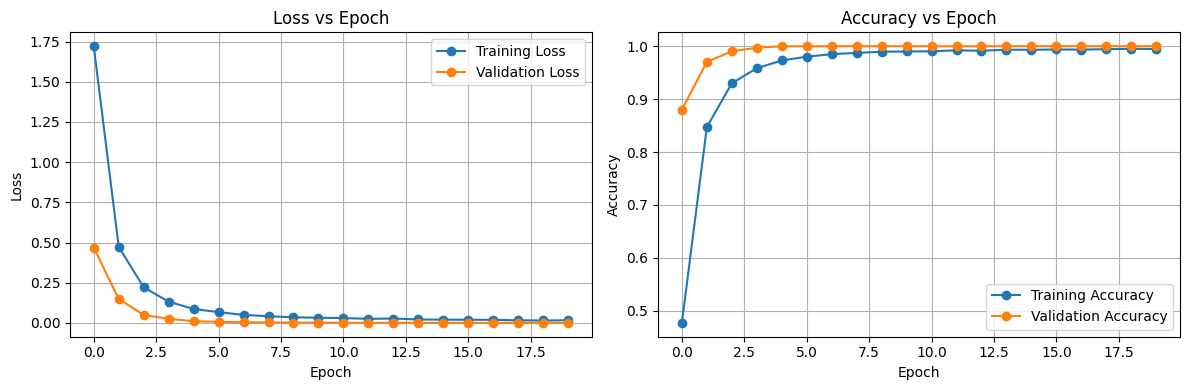

In [ ]:
X = df.drop('label', axis=1).values
y = df['label'].values
X = X.reshape(-1, 28, 28, 1) #(No. of images, Height, Width, RGB Channel Number)
X = X / 255.0 #Normalise Pixel values
y = keras.utils.to_categorical(y, num_classes=26)

history = model.fit(X, y, epochs=20, validation_split=0.2, batch_size=64)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy',marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.title('Accuracy vs Epoch')

plt.tight_layout()
plt.show()

In [ ]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])

Training Accuracy: 0.9946275949478149
Validation Accuracy: 1.0
Training Loss: 0.016629228368401527
Validation Loss: 0.00022616818023379892


In [ ]:
df=pd.read_csv('sign_mnist_train.csv')

In [ ]:
model1 = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten the feature maps
    layers.Flatten(),
    # Fully Connected Layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.40),  # Dropout to prevent overfitting
    # Output Layer
    layers.Dense(26, activation='softmax')  # 26 classes for 'A'-'Z'
])
model1.compile(optimizer='adamW',loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

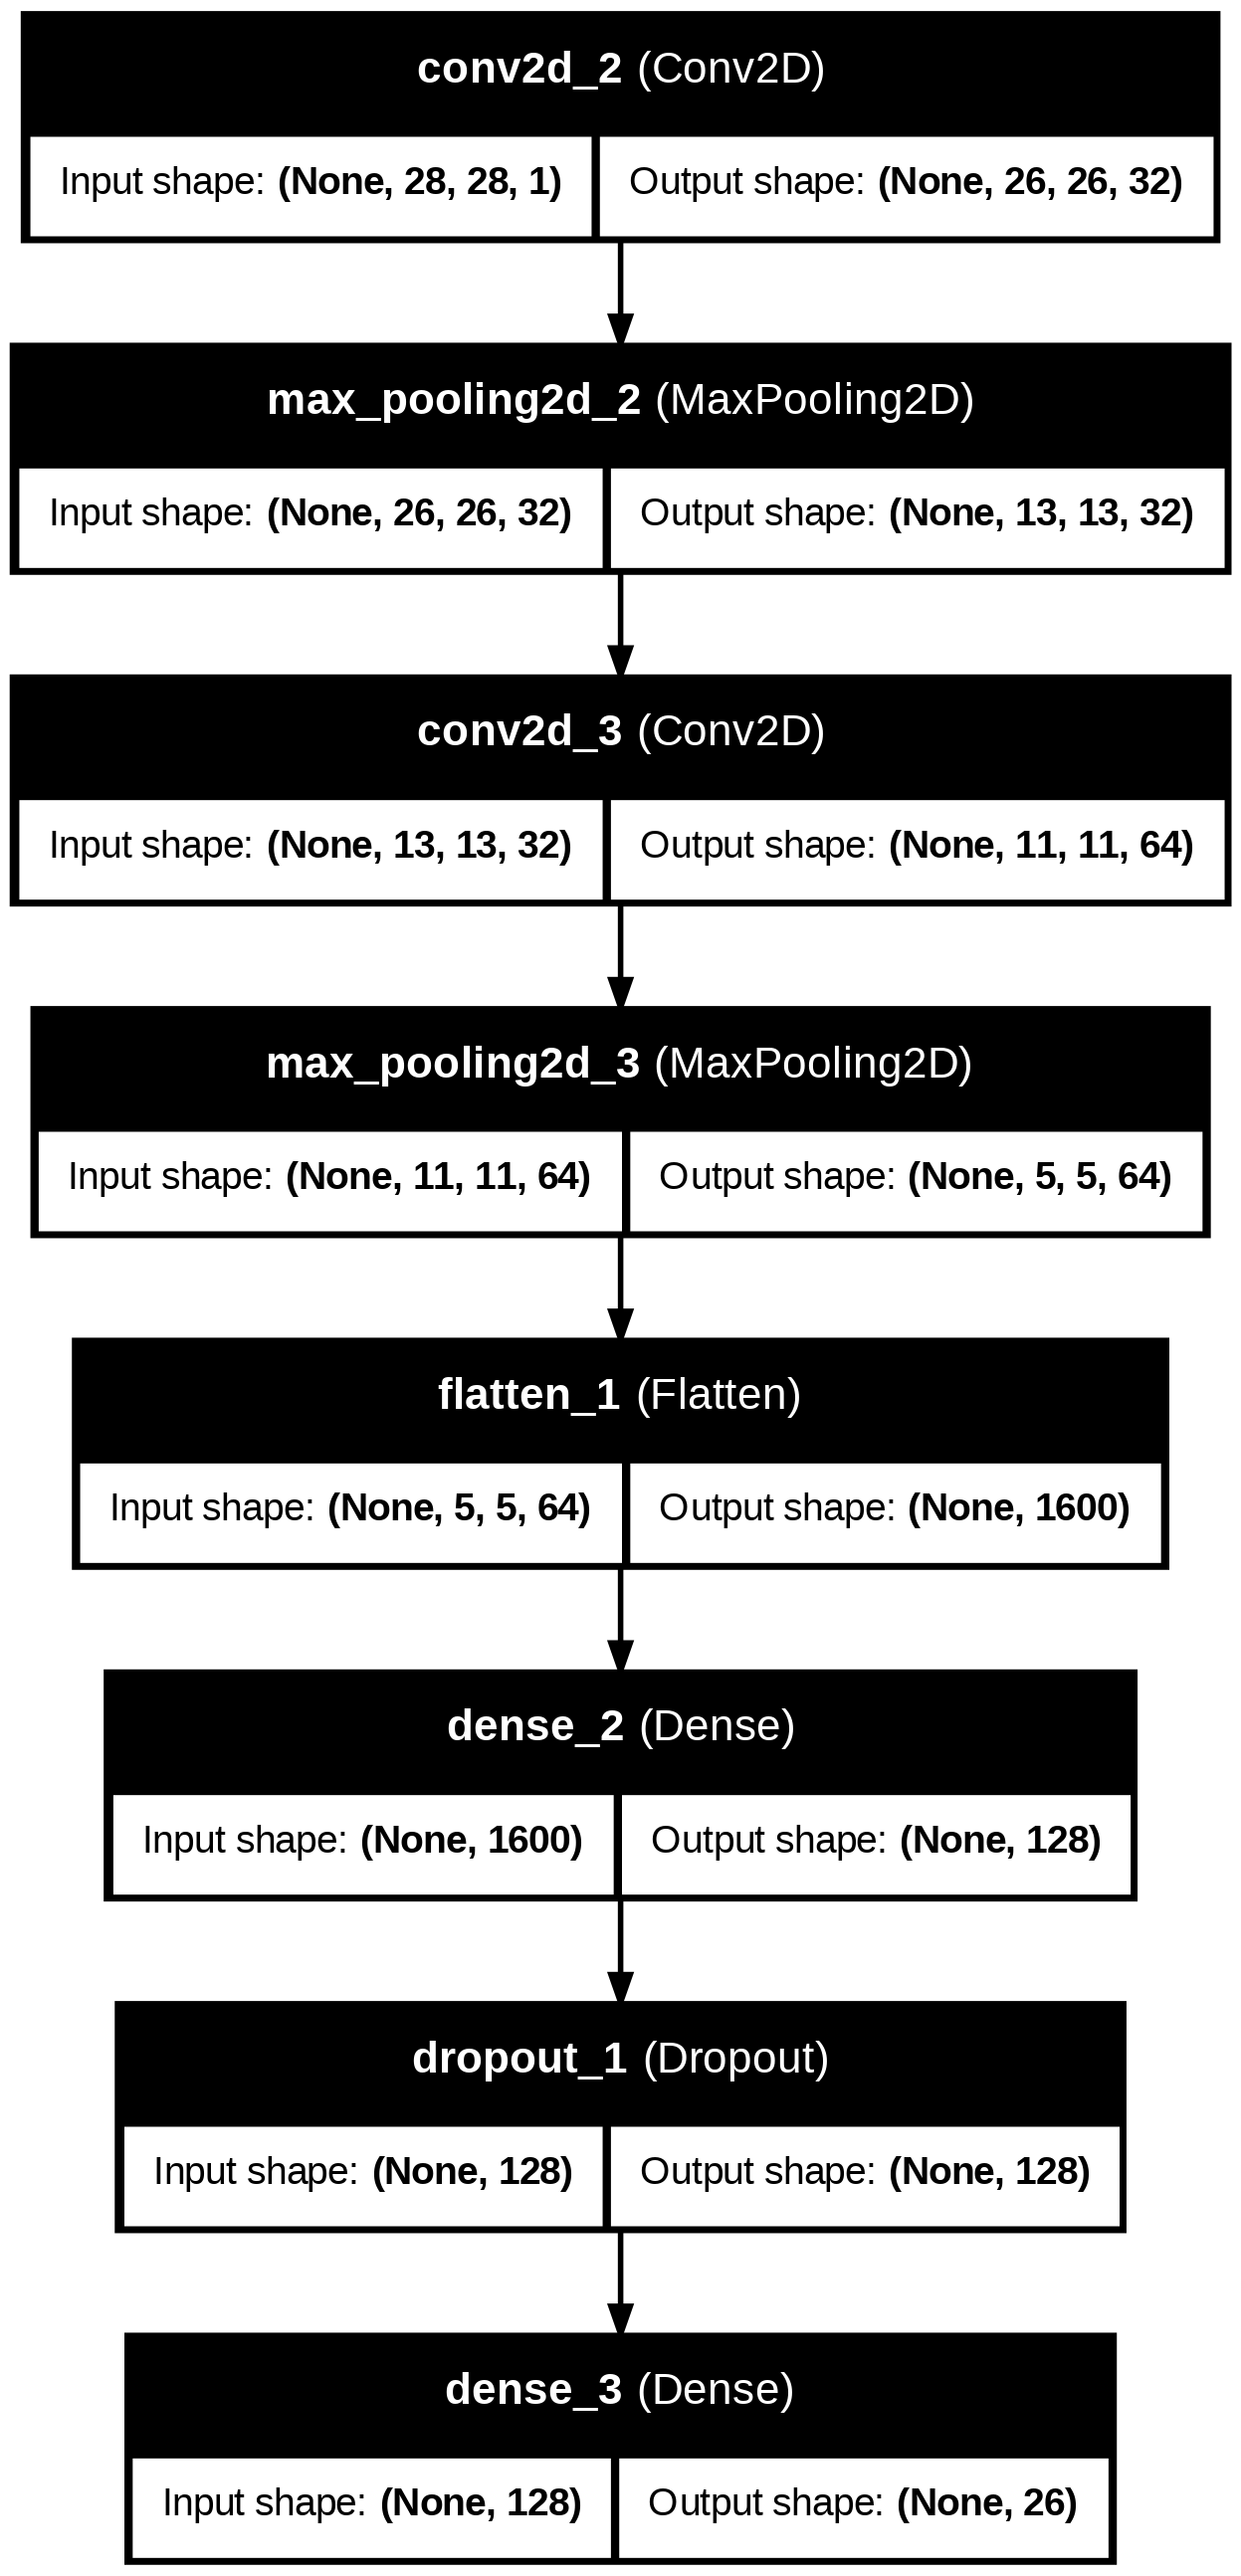

In [ ]:
plot_model(model1, to_file='model_architecture_1.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_architecture_1.png', width=400)

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.2128 - loss: 2.6434 - val_accuracy: 0.8148 - val_loss: 0.6490
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7469 - loss: 0.7803 - val_accuracy: 0.9579 - val_loss: 0.1925
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8808 - loss: 0.3638 - val_accuracy: 0.9914 - val_loss: 0.0631
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9295 - loss: 0.2173 - val_accuracy: 0.9987 - val_loss: 0.0262
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9548 - loss: 0.1393 - val_accuracy: 0.9987 - val_loss: 0.0162
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9628 - loss: 0.1118 - val_accuracy: 0.9995 - val_loss: 0.0114
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9683 - loss: 0.0917 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9736 - loss: 0.0808 - 

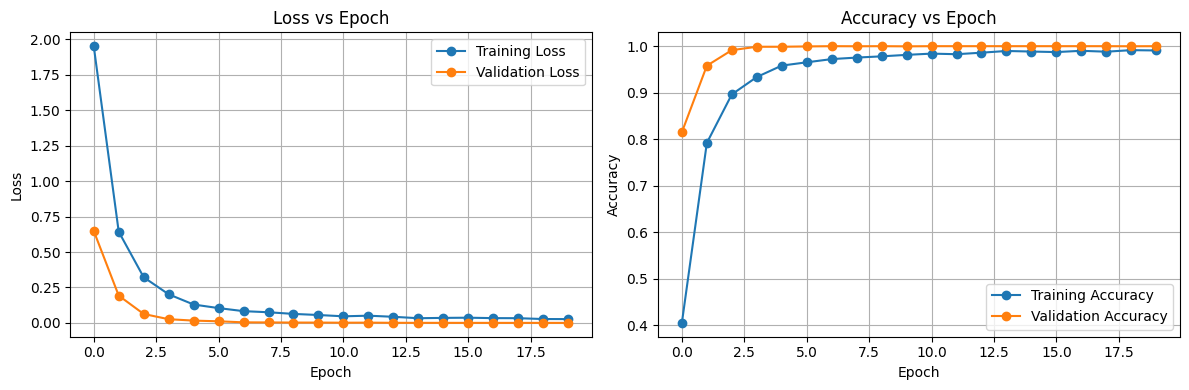

In [ ]:
X = df.drop('label', axis=1).values
y = df['label'].values
X = X.reshape(-1, 28, 28, 1) #(No. of images, Height, Width, RGB Channel Number)
X = X / 255.0 #Normalise Pixel values
y = keras.utils.to_categorical(y, num_classes=26)

history = model1.fit(X, y, epochs=20, validation_split=0.2,batch_size=64)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy',marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.title('Accuracy vs Epoch')

plt.tight_layout()
plt.show()

In [ ]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])

Training Accuracy: 0.9907575845718384
Validation Accuracy: 1.0
Training Loss: 0.026900192722678185
Validation Loss: 0.00017669306544121355


In [ ]:
test_loss, test_accuracy = model.evaluate(X, y)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
test_loss1, test_accuracy1 = model1.evaluate(X, y)
print(f"Test Loss: {test_loss1}")
print(f"Test Accuracy: {test_accuracy1}")
with open('observations.txt', 'w') as file:
    file.write("### Observations ###\n")
    file.write("\n1. Overfitting Issues:\n")
    file.write("Analyzing the training and validation curves, it can be observed whether there is a "
               "gap between training and validation loss/accuracy, indicating overfitting.\n")
    file.write("Adding a Dropout layer with rate 0.4 can further reduce overfitting by increasing regularization.\n\n")

    file.write("2. Share Structure Property:\n")
    file.write("The CNN architecture uses shared convolutional kernels that extract features "
               "irrespective of the position of the feature in the image.\n\n")

    file.write("3. Invariance Property:\n")
    file.write("The pooling layers ensure translational invariance by reducing the sensitivity of the network "
               "to small spatial shifts in the input images.\n\n")

    file.write("4. Recommendations:\n")
    file.write("- Consider adding another Dropout layer (rate 0.4) after the convolutional layers to address overfitting.\n")
    file.write("- Use techniques like data augmentation (rotation, flipping, scaling) to improve the model's generalization.\n")
    file.write("- Experiment with different optimizer hyperparameters for further improvement.\n")

print("Observations have been saved to 'observations.txt'.")

858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 1.0000 - loss: 2.2458e-04
Test Loss: 0.00024055149697232991
Test Accuracy: 1.0
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 1.0000 - loss: 2.8043e-04
Test Loss: 0.00020489896996878088
Test Accuracy: 1.0
Observations have been saved to 'observations.txt'.


# Problem 2 : Time Series Forecasting using LSTMs

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error,root_mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Dataset

In [ ]:
dtype_dict = {
    'Global_active_power': 'float64',
    'Global_reactive_power': 'float64',
    'Voltage': 'float64',
    'Global_intensity': 'float64',
    'Sub_metering_1': 'float64',
    'Sub_metering_2': 'float64',
    'Sub_metering_3': 'float64'
}
data = pd.read_csv("household_power_consumption.txt",sep=';', dtype=dtype_dict,na_values='?', low_memory=False  )
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True)
data.drop(columns=['Date', 'Time'], inplace=True)
data.dropna(inplace=True)
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [ ]:
data.set_index('Datetime', inplace=True)
daily_data = data['Global_active_power'].resample('D').sum()
daily_data = daily_data.to_frame(name='Daily_power')
daily_data

,Daily_power
Datetime,
2006-12-16,1209.176
2006-12-17,3390.460
2006-12-18,2203.826
2006-12-19,1666.194
2006-12-20,2225.748
...,...
2010-11-22,2041.536
2010-11-23,1577.536
2010-11-24,1796.248


In [ ]:
scaler = StandardScaler()
daily_data_scaled = scaler.fit_transform(daily_data)
daily_data_scaled

array([[-0.55447782],
       [ 2.98035277],
       [ 1.05737981],
       ...,
       [ 0.39688847],
       [-0.19474017],
       [-0.10246734]])

In [ ]:
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        seq = data[i:i+window_size]
        label = data[i+window_size]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

window_size = 7
X, y = create_sequences(daily_data_scaled, window_size)

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X

array([[[-0.55447782],
        [ 2.98035277],
        [ 1.05737981],
        ...,
        [ 1.09290501],
        [ 0.26785559],
        [ 1.28022178]],

       [[ 2.98035277],
        [ 1.05737981],
        [ 0.1861324 ],
        ...,
        [ 0.26785559],
        [ 1.28022178],
        [ 5.22142231]],

       [[ 1.05737981],
        [ 0.1861324 ],
        [ 1.09290501],
        ...,
        [ 1.28022178],
        [ 5.22142231],
        [ 1.61838372]],

       ...,

       [[ 0.04974556],
        [ 0.16337695],
        [ 0.03089559],
        ...,
        [-1.05403133],
        [ 0.79438441],
        [ 0.04245967]],

       [[ 0.16337695],
        [ 0.03089559],
        [ 1.04632781],
        ...,
        [ 0.79438441],
        [ 0.04245967],
        [ 0.39688847]],

       [[ 0.03089559],
        [ 1.04632781],
        [-1.05403133],
        ...,
        [ 0.04245967],
        [ 0.39688847],
        [-0.19474017]]])

### Model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = Sequential([LSTM(100, activation='tanh', input_shape=(X.shape[1], 1)),Dense(1)])
model.compile(optimizer='adamW', loss='mse')
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8631 - val_loss: 0.5605
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5897 - val_loss: 0.5464
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5667 - val_loss: 0.5289
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5450 - val_loss: 0.5240
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5619 - val_loss: 0.5128
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5834 - val_loss: 0.5012
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5709 - val_loss: 0.4991
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5318 - val_loss: 0.4959
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4688 - val_loss: 0.4878
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4943 - val_loss: 0.4834
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5241 - val_loss: 0.4784
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4867 

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,705 (479.32 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,804 (319.55 KB)

###Model Training and Evaluation

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


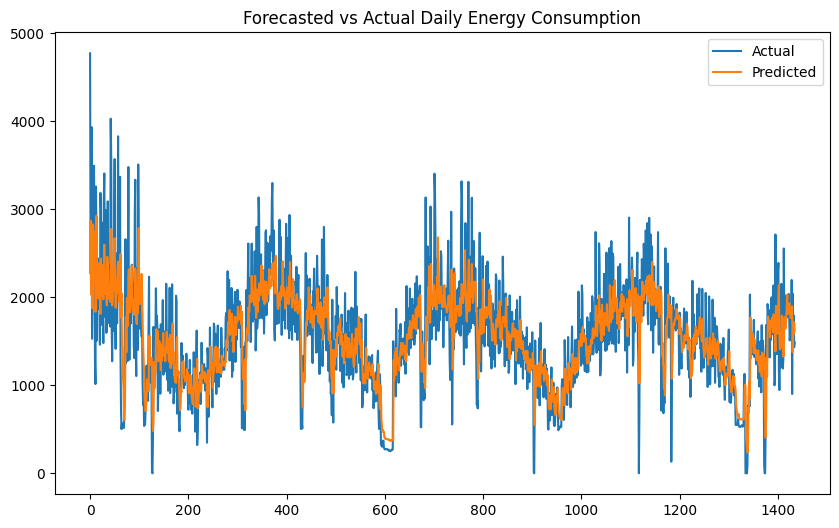

In [ ]:
predictions = model.predict(X)
y_true = scaler.inverse_transform(y.reshape(-1, 1))
y_pred = scaler.inverse_transform(predictions)
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Forecasted vs Actual Daily Energy Consumption')
plt.show()

In [ ]:
train_loss = model.evaluate(x_train, y_train, verbose=0)
test_loss = model.evaluate(x_test, y_test, verbose=0)
print(f"Train  Loss: {train_loss}")
print(f"Test Loss: {test_loss}")
y_pred=model.predict(x_test)
y_true=y_test
test_mae=mean_absolute_error(y_true,y_pred)
print(f" MAE: {test_mae}")
test_root_mean_squared=root_mean_squared_error(y_true,y_pred)
print(f" RMSE: {test_root_mean_squared}")


Train  Loss: 0.48781779408454895
Test Loss: 0.46264660358428955
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 MAE: 0.5079235308502742
 RMSE: 0.6801812755325484
